### Projet 4: decomposer une image sur une base d'ondlelettes.
========
========
--------
Ricardo

Safwane

In [9]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import cv2
import math
import scipy
%matplotlib inline  
scipy.__version__

ModuleNotFoundError: No module named 'scipy'

 1) Programmer l'algorithme obtenu à la fin de la séance pour un vecteur de taille ${2^{q}}$ où q
est un entier strictement positif arbitraire.

In [ ]:
import numpy as np

# La fonction suivante calcule la matrice de décomposition Wd de taille égale à la taille du vecteur
def matricedecompo(v,k):
    n = len(v)
    M = np.zeros((n,n))
    for i in range(n//2**k):
        M[i][2*i] = 1/2
        M[i][2*i+1] = 1/2
    j=0
    for i in range(n//2**k,n//k):
        M[i][2*j] = -1/2
        M[i][2*j+1] = 1/2
        j+=1
    if k>1:
        for i in range(n//k,n):
            M[i][i]=1
    return M

# exemple
v = [7,1,6,6,3,-5,4,2]
M = matricedecompo(v,2)
print(M)


In [ ]:
# La fonction suivante correspond à la transformée de Haar d'un vecteur
def decomposition(v,k):
    for j in range(1,k+1):
        M = matricedecompo(v,j)
        v = np.dot(M,v)
    return(v)
decomposition(v,1)

In [ ]:
# La fonction suivante calcule la matrice de recomposition à partir de la transposée de la matrice Wd
def matricerecompo(v,k):
    n = len(v)
    M=np.transpose(2*matricedecompo(v,k))
    if k>1:
        for i in range(n//k,n):
            M[i][i]=1
    return M

V = decomposition(v,1)
M = matricerecompo(V,2)
print(M)

In [ ]:
# La fonction suivante correspond à la transformée inverse de Haar d'un vecteur
def recomposition(v,k):
    for j in range(k,0,-1):
        M = matricerecompo(v,j)
        v = np.dot(M,v)
    return(v)
k=3
print(v)
print(decomposition(v,k))
print(recomposition(decomposition(v,k),k))

2) Étendre l'algorithme précédent au cas d'une image (Lena.png). Il faudra veiller au formalisme
mathématique lorsque la décomposition sera écrite sous forme matricielle. Programmer
l'algorithme proposé puis étudier et expliquer ses performances sur le image fournies par l'ingénieur.

In [ ]:
im = (cv2.imread('lena.png',0))
(ligne,colonne)=im.shape
plt.figure(figsize = (5,5))
plt.imshow(im, cmap = 'gray')
plt.show()


In [ ]:
# La fonction suivante réalise la décomposition des lignes d'une matrice
def decomposition_ligne(im,taille):
    img = copy.deepcopy(im)
    (ligne,colonne)=taille
    for i in range(ligne):
        img[i] = decomposition(img[i],1)
    return(img)

# La fonction suivante réalise la décomposition des colonnes d'une matrice
def decomposition_colonne(im,taille):
    img = copy.deepcopy(im)
    (ligne,colonne)=taille
    for i in range(colonne):
        img[0:ligne,i] = decomposition(img[0:ligne,i],1)
    return(img)

# La fonction suivante réalise nb fois la décomposition d'une matrice sur les lignes et les colonnes
# et affiche les décompositions successives
def affichage_decomposition_successive(im,nb):
    image_decompo=copy.deepcopy(im)
    for k in range(nb):
        taille=(ligne//2**k,colonne//2**k)
        image_decompo[0:ligne//2**k,0:ligne//2**k]=decomposition_ligne(image_decompo[0:ligne//2**k,0:ligne//2**k],taille)
        plt.figure(figsize = (20,10))
        plt.title("Décomposition ligne n°"+str(k+1))
        plt.imshow(image_decompo, cmap = 'gray')
        plt.show()
        image_decompo[0:ligne//2**k,0:ligne//2**k]=decomposition_colonne(image_decompo[0:ligne//2**k,0:ligne//2**k],taille)
        plt.figure(figsize = (20,10))
        plt.title("Décomposition colonne n°"+str(k+1))
        plt.imshow(image_decompo, cmap = 'gray')
        plt.show()

# Ici on fait nb fois la même décomposition et on renvoie l'image décomposée sans afficher les étapes
def decomposition_successive(im,nb):
    image_decompo=copy.deepcopy(im)
    for k in range(nb):
        taille=(ligne//2**k,colonne//2**k)
        image_decompo[0:ligne//2**k,0:ligne//2**k]=decomposition_ligne(image_decompo[0:ligne//2**k,0:ligne//2**k],taille)
        image_decompo[0:ligne//2**k,0:ligne//2**k]=decomposition_colonne(image_decompo[0:ligne//2**k,0:ligne//2**k],taille)
    return image_decompo

nombre_iteration=2

# On affiche les décompositions successives
affichage_decomposition_successive(im,nombre_iteration)



In [ ]:
# La fonction suivante réalise la recomposition des lignes d'une matrice
def recomposition_ligne(im,taille):
    img = copy.deepcopy(im)
    (ligne,colonne)=taille
    for i in range(ligne):
        img[i] = recomposition(img[i],1)
    return(img)

# La fonction suivante réalise la recomposition des colonnes d'une matrice
def recomposition_colonne(im,taille):
    img = copy.deepcopy(im)
    (ligne,colonne)=taille
    for i in range(colonne):
        img[:,i] = recomposition(img[:,i],1)
    return(img)

# La fonction suivante réalise nb fois la recomposition d'une matrice sur les lignes et les colonnes
# et affiche les recompositions successives
def affichage_recomposition_successive(image_decomposee,nb):
    image_recompo=copy.deepcopy(image_decomposee)
    for k in range(nb,0,-1):
        taille=(ligne//2**(k-1),colonne//2**(k-1))
        image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)]=recomposition_colonne(image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)],taille)
        plt.figure(figsize = (20,10))
        plt.title("Recomposition colonne n°"+str(nb-k+1))
        plt.imshow(image_recompo, cmap = 'gray')
        plt.show()
        image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)]=recomposition_ligne(image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)],taille)
        plt.figure(figsize = (20,10))
        plt.title("Recomposition ligne n°"+str(nb-k+1))
        plt.imshow(image_recompo, cmap = 'gray')
        plt.show()

# Ici on fait nb fois la même recomposition et on renvoie l'image recomposée sans afficher les étapes
def recomposition_successive(image_decomposee,nb):
    image_recompo=copy.deepcopy(image_decomposee)
    for k in range(nb,0,-1):
        taille=(ligne//2**(k-1),colonne//2**(k-1))
        image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)]=recomposition_colonne(image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)],taille)
        image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)]=recomposition_ligne(image_recompo[0:ligne//2**(k-1),0:ligne//2**(k-1)],taille)
    return image_recompo
        
# On affiche les recompositions successives
affichage_recomposition_successive(decomposition_successive(im,nombre_iteration),nombre_iteration)


3)Applications de la transformée de Haar.
Method:

## Cas 3 : Débruitage d’images

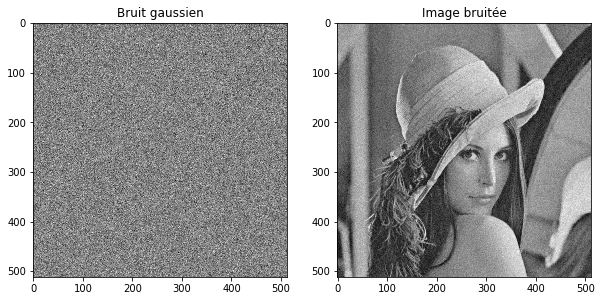

In [10]:
# Définition du bruit gaussien
def bruit(sigma, taille):
    return np.random.normal(0,sigma,taille)

b=bruit(10,im.shape)
image_bruitee=copy.deepcopy(im)
image_bruitee=image_bruitee+b 

plt.figure(2,figsize = (10,10))
plt.subplot(121)
plt.title("Bruit gaussien")
plt.imshow(b,cmap = 'gray')
plt.subplot(122)
plt.title("Image bruitée")
plt.imshow(image_bruitee,cmap = 'gray')
plt.show()


In [11]:
image_dec_bruitee1=decomposition_successive(image_bruitee,1)

# On enlève les pixels trop bruités après avoir fait la décomposition
def enlever_bruit(image_dec_bruitee,seuil):
    for i in range(512):
        for j in range(512):
            if(abs(image_dec_bruitee[i][j])<seuil):
                image_dec_bruitee[i][j]=0

seuil=15
enlever_bruit(image_dec_bruitee1,seuil)


In [12]:
# On recompose l'image bruitée après avoir enlevé le bruit
image_recompo_bruitee1=recomposition_successive(image_dec_bruitee1,1)

plt.figure(2,figsize = (15,15))
plt.subplot(121)
plt.title("Image bruitée")
plt.imshow(image_bruitee,cmap = 'gray')
plt.subplot(122)
plt.title("Image reconstruite débruitée")
plt.imshow(image_recompo_bruitee1,cmap = 'gray')
plt.show()

NameError: name 'recomposition_successive' is not defined

In [ ]:
# Comparaison de deux ordres de décompositions différents
plt.figure(0,figsize = (20,20))
# On affiche différentes images débruitées pour des ordres de décomposition différents
for i in [(1,221),(2,222)]:
    plt.subplot(i[1])
    image_dec_bruitee=decomposition_successive(image_bruitee,i[0])
    enlever_bruit(image_dec_bruitee,seuil)
    image_recompo_bruitee=recomposition_successive(image_dec_bruitee,i[0])
    plt.title("Image reconstruite débruitée d'ordre"+str(i[0]))
    plt.imshow(image_recompo_bruitee,cmap = 'gray')
plt.show()

Avec un ordre de décomposition plus élevé, le bruit diminue mais l'image est moins nette. Il y a un compromis. Si on veut afficher une image de grande taille il est préférable d'utiliser un ordre bas. À l'inverse si on veut afficher l'image en petit, un ordre plus élevé est meilleur car l'image sera plus nette.